# Explorando a biblioteca Pandas

Referências:

https://github.com/guipsamora/pandas_exercises

https://pandas.pydata.org/docs/user_guide/10min.html#min

https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook

## Obtenção e exploração de bases de dados


### 1. Importar a biblioteca

In [ ]:
import pandas as pd
import numpy as np

### 02. Importar os dados 

In [ ]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
orders = pd.read_csv(url, sep = '\t') #é um arquivo separado por tabulação, por isso o separador é um \t

### 03. Verificar os 10 primeiros dados

In [ ]:
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 04. Verificar os últimos registros

In [ ]:
orders.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


### 05. Exbir número de linhas e colunas

In [ ]:
print(orders.shape)
print('linhas: ' + str(orders.shape[0]))
print('colunas: '+ str(orders.shape[1]))

(4622, 5)
linhas: 4622
colunas: 5


### 06. Tipos de dados

In [ ]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

### 07. Informações sobre indexação dos dados

In [ ]:
orders.index

RangeIndex(start=0, stop=4622, step=1)

### 09. Exibir nome das colunas

In [ ]:
orders.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### 08. Informações gerais do dataframe

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### 09. Alterar tipo de dado de uma coluna

In [ ]:
#checar tipo de dado
orders.item_price.dtype
 
#criar expressão lambda para converter os valores de preço em string para float
converter_dolar_float = lambda x: float(x[1:-1])
 
#aplicar lambda para fazer a conversão
orders.item_price = orders.item_price.apply(converter_dolar_float)
    
#exibir o novo tipo da coluna
orders.item_price.dtype

dtype('float64')

### 10. Quantos itens foram vendidos no total?

In [ ]:
total_items_orders = orders.quantity.sum()
total_items_orders

4972

### 11. Qual a receita total obtida?

In [ ]:
a = orders.apply(lambda x: x[1] * x[4], axis=1)

In [ ]:
a

0        2.39
1        3.39
2        3.39
3        2.39
4       33.96
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Length: 4622, dtype: float64

In [ ]:
(orders.quantity * orders.item_price).sum()

39237.02

In [ ]:
orders

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [ ]:
orders.apply(lambda x: x[1]*x[4], axis=1)

0        2.39
1        3.39
2        3.39
3        2.39
4       33.96
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Length: 4622, dtype: float64

In [ ]:
receita = (orders['quantity']* orders['item_price']).sum()

print('A receita foi de: U$' + str(np.round(receita,2)))

A receita foi de: U$39237.02


### 12. Quantos pedidos foram realizados?

In [ ]:
orders.order_id.nunique()

1834

### 13. Qual são os 5 produtos mais populares entre os clientes?

In [ ]:
#Solução 1

orders.item_name.value_counts().index[0:5]

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink'],
      dtype='object')

In [ ]:
#Solução 2

orders.item_name.value_counts().head()

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

### 14. Sumarizar distribuição dos dados da base

In [ ]:
orders.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [ ]:
orders.describe(include="all")

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622.000000
unique,NaN,NaN,50,1043,NaN
top,NaN,NaN,Chicken Bowl,[Diet Coke],NaN
freq,NaN,NaN,726,134,NaN
mean,927.254868,1.075725,NaN,NaN,7.464336
std,528.890796,0.410186,NaN,NaN,4.245557
min,1.000000,1.000000,NaN,NaN,1.090000
25%,477.250000,1.000000,NaN,NaN,3.390000
50%,926.000000,1.000000,NaN,NaN,8.750000
75%,1393.000000,1.000000,NaN,NaN,9.250000


### 15. Sumarizar uma coluna em específico

In [ ]:
orders.item_price.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

### 16. Checar números de dados ausentes por coluna

In [ ]:
orders.isnull()

,order_id,quantity,item_name,choice_description,item_price
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
...,...,...,...,...,...
4617,False,False,False,False,False
4618,False,False,False,False,False
4619,False,False,False,False,False
4620,False,False,False,False,False


In [ ]:
orders.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

### 17. Exibir percentual de dados ausentes por coluna

In [ ]:
orders.isnull().sum()/orders.shape[0]

order_id              0.00000
quantity              0.00000
item_name             0.00000
choice_description    0.26958
item_price            0.00000
dtype: float64

### 18. Substituir valores ausentes da coluna 'choice_description' por '-'

In [ ]:
orders.choice_description = orders.choice_description.fillna('-')

In [ ]:
orders.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

In [ ]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,-,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,-,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


### 19. Remova o valor da coluna 'quantity' das 10 primeiras linhas e substitua as 5 primeiras pela moda e as demais pela média dos valores da coluna.

In [ ]:
orders.quantity[:10] = np.nan
orders.head(11)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,order_id,quantity,item_name,choice_description,item_price
0,1,NaN,Chips and Fresh Tomato Salsa,-,2.39
1,1,NaN,Izze,[Clementine],3.39
2,1,NaN,Nantucket Nectar,[Apple],3.39
3,1,NaN,Chips and Tomatillo-Green Chili Salsa,-,2.39
4,2,NaN,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,NaN,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,NaN,Side of Chips,-,1.69
7,4,NaN,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,NaN,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,NaN,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [ ]:
orders.quantity[:5] = int(orders.quantity.mode())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
orders.quantity.head(10)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    NaN
7    NaN
8    NaN
9    NaN
Name: quantity, dtype: float64

In [ ]:
orders.quantity[5:10] = round(orders.quantity.mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
orders.quantity.head(10)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: quantity, dtype: float64

## Filtragem e ordenação


### 01. Importar biblioteca

In [ ]:
import pandas as pd

### 02. Transformar um dicionário em um dataframe

In [ ]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

In [ ]:
army = pd.DataFrame(data=raw_data)
army

,regiment,company,deaths,battles,size,veterans,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,0,24,California
2,Nighthawks,2nd,25,2,1099,62,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,1,2,Florida
4,Dragoons,1st,43,4,1592,73,0,3,Maine
5,Dragoons,1st,234,7,1006,37,1,4,Iowa
6,Dragoons,2nd,523,8,987,949,0,24,Alaska
7,Dragoons,2nd,62,3,849,48,1,31,Washington
8,Scouts,1st,62,4,973,48,0,2,Oregon
9,Scouts,1st,73,7,1005,435,0,3,Wyoming


### 03. Traduzir nome das colunas

In [ ]:
army.columns

Index(['regiment', 'company', 'deaths', 'battles', 'size', 'veterans',
       'armored', 'deserters', 'origin'],
      dtype='object')

In [ ]:
army.columns = ['regimento', 'companhia', 'mortes', 'batalhas', 'tamanho', 'veteranos', 'blindados', 'desertores', 'origem']

In [ ]:
army.columns

Index(['regimento', 'companhia', 'mortes', 'batalhas', 'tamanho', 'veteranos',
       'blindados', 'desertores', 'origem'],
      dtype='object')

### 04. Definir a coluna 'origem' como índice

In [ ]:
army.set_index('origem', inplace=True)
army

,regimento,companhia,mortes,batalhas,tamanho,veteranos,blindados,desertores
origem,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,4
California,Nighthawks,1st,52,42,957,5,0,24
Texas,Nighthawks,2nd,25,2,1099,62,1,31
Florida,Nighthawks,2nd,616,2,1400,26,1,2
Maine,Dragoons,1st,43,4,1592,73,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,4
Alaska,Dragoons,2nd,523,8,987,949,0,24
Washington,Dragoons,2nd,62,3,849,48,1,31
Oregon,Scouts,1st,62,4,973,48,0,2


### 05. Exibir o número de veteranos por estado

In [ ]:
army.veteranos

origem
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veteranos, dtype: int64

### 06. Exibir o número de veteranos e falecidos por estado ordenados pelo número de mortes em ordem decrescente.

In [ ]:
army[[ "mortes","veteranos"]].sort_values("mortes", ascending=False)

,mortes,veteranos
origem,,
Florida,616,26
Arizona,523,1
Alaska,523,949
Iowa,234,37
Wyoming,73,435
Washington,62,48
Oregon,62,48
California,52,5
Maine,43,73


### 07. Selecionar as colunas 'tamanho', 'veteranos' e 'desertores' dos estados Maine e Alaska.

In [ ]:
army.loc[["Maine", "Alaska"], ["tamanho", "veteranos", "desertores"]]

,tamanho,veteranos,desertores
origem,,,
Maine,1592,73,3
Alaska,987,949,24


### 08. Selecionar as linhas de 3 a 7 e as colunas de 3 a 6

In [ ]:
army.iloc[2:7, 2:6]

,mortes,batalhas,tamanho,veteranos
origem,,,,
Texas,25,2,1099,62
Florida,616,2,1400,26
Maine,43,4,1592,73
Iowa,234,7,1006,37
Alaska,523,8,987,949


### 09. Selecionar todas as linas após a 4º com todas as colunas

In [ ]:
army.iloc[4:, :]

,regimento,companhia,mortes,batalhas,tamanho,veteranos,blindados,desertores
origem,,,,,,,,
Maine,Dragoons,1st,43,4,1592,73,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,4
Alaska,Dragoons,2nd,523,8,987,949,0,24
Washington,Dragoons,2nd,62,3,849,48,1,31
Oregon,Scouts,1st,62,4,973,48,0,2
Wyoming,Scouts,1st,73,7,1005,435,0,3
Louisana,Scouts,2nd,37,8,1099,63,1,2
Georgia,Scouts,2nd,35,9,1523,345,1,3


### 10. Selecionar as 4 primeiras linhas com todas as colunas

In [ ]:
army.iloc[:4, :]

,regimento,companhia,mortes,batalhas,tamanho,veteranos,blindados,desertores
origem,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,4
California,Nighthawks,1st,52,42,957,5,0,24
Texas,Nighthawks,2nd,25,2,1099,62,1,31
Florida,Nighthawks,2nd,616,2,1400,26,1,2


### 11. Selecionar da 3º até a 7º coluna

In [ ]:
army.iloc[:, 2:7]

,mortes,batalhas,tamanho,veteranos,blindados
origem,,,,,
Arizona,523,5,1045,1,1
California,52,42,957,5,0
Texas,25,2,1099,62,1
Florida,616,2,1400,26,1
Maine,43,4,1592,73,0
Iowa,234,7,1006,37,1
Alaska,523,8,987,949,0
Washington,62,3,849,48,1
Oregon,62,4,973,48,0


###12. Selecionar as linhas cujo número de mortes seja superior a 50, ordenados pelas colunas "regimento" e "companhia"


In [ ]:
army[army["mortes"] > 50].sort_values(["regimento", "companhia"])

,regimento,companhia,mortes,batalhas,tamanho,veteranos,blindados,desertores
origem,,,,,,,,
Iowa,Dragoons,1st,234,7,1006,37,1,4
Alaska,Dragoons,2nd,523,8,987,949,0,24
Washington,Dragoons,2nd,62,3,849,48,1,31
Arizona,Nighthawks,1st,523,5,1045,1,1,4
California,Nighthawks,1st,52,42,957,5,0,24
Florida,Nighthawks,2nd,616,2,1400,26,1,2
Oregon,Scouts,1st,62,4,973,48,0,2
Wyoming,Scouts,1st,73,7,1005,435,0,3


### 13. Selecionar as linhas cujo número de mortes seja maior que 50 e menor que 500 e ordená-las do menor número para o maior.

In [ ]:
army[(army["mortes"] > 50) & (army["mortes"] < 500)].sort_values("mortes",ascending = True)

,regimento,companhia,mortes,batalhas,tamanho,veteranos,blindados,desertores
origem,,,,,,,,
California,Nighthawks,1st,52,42,957,5,0,24
Washington,Dragoons,2nd,62,3,849,48,1,31
Oregon,Scouts,1st,62,4,973,48,0,2
Wyoming,Scouts,1st,73,7,1005,435,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,4


### 15. Selecionar exércitos de todos os regimentos exceto os "Dragoons"

In [ ]:
army[army["regimento"] != "Dragoons"]

,regimento,companhia,mortes,batalhas,tamanho,veteranos,blindados,desertores
origem,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,4
California,Nighthawks,1st,52,42,957,5,0,24
Texas,Nighthawks,2nd,25,2,1099,62,1,31
Florida,Nighthawks,2nd,616,2,1400,26,1,2
Oregon,Scouts,1st,62,4,973,48,0,2
Wyoming,Scouts,1st,73,7,1005,435,0,3
Louisana,Scouts,2nd,37,8,1099,63,1,2
Georgia,Scouts,2nd,35,9,1523,345,1,3


### 15. Selecionar as linhas denominadas "Texas" e "Arizona"

In [ ]:
#Solução 01

army.loc[["Texas", "Arizona"], :]

,regimento,companhia,mortes,batalhas,tamanho,veteranos,blindados,desertores
origem,,,,,,,,
Texas,Nighthawks,2nd,25,2,1099,62,1,31
Arizona,Nighthawks,1st,523,5,1045,1,1,4


In [ ]:
#Solução 02
army[army.index.isin(["Texas", "Arizona"])]

,regimento,companhia,mortes,batalhas,tamanho,veteranos,blindados,desertores
origem,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,1,31


### 16. Selecionar a 3º célula da linha denominada Arizona.

In [ ]:
army.loc[["Arizona"]].iloc[:, 2]

origem
Arizona    523
Name: mortes, dtype: int64

### 17. Selecione a 3º célula da coluna "mortes"

In [ ]:
army.loc[:, ["mortes"]].iloc[2]

mortes    25
Name: Texas, dtype: int64

## Agrupando dados



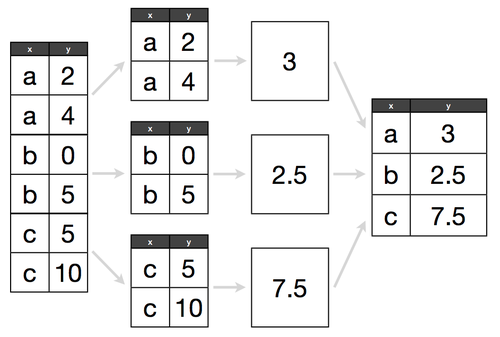

### 01. Importar biblioteca

In [ ]:
import pandas as pd

### 02. importar dados deste link: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv 

In [ ]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### 03. Exibir as informações gerais do dataframe

In [ ]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### 04. Qual continente consome mais cerveja em média?

In [ ]:
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

### 05. Para cada continente, exiba as estatísticas de consumo de vinho.

In [ ]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### 06. Exibir a média de consumo de cada bebida por continente.

In [ ]:
drinks[['continent','beer_servings', 'spirit_servings', 'wine_servings']].groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings
continent,,,
AF,61.471698,16.339623,16.264151
AS,37.045455,60.840909,9.068182
EU,193.777778,132.555556,142.222222
OC,89.687500,58.437500,35.625000
SA,175.083333,114.750000,62.416667


### 07. Exibir os valores mínimo, médio e máximo de consumo de litros de puro álcool por continente. 

In [ ]:
drinks.groupby('continent').total_litres_of_pure_alcohol.agg(['mean', 'min', 'max'])

,mean,min,max
continent,,,
AF,3.007547,0.0,9.1
AS,2.170455,0.0,11.5
EU,8.617778,0.0,14.4
OC,3.381250,0.0,10.4
SA,6.308333,3.8,8.3


### 08. Exibir a quantitade de países, a média e a mediana do consumo de cada bebida e o somatório do total de litros de álcool por continente.


In [ ]:
drinks.groupby('continent').agg({'country':'count', 'beer_servings':['mean', 'median'], \
                               'spirit_servings':['mean', 'median'], 'wine_servings': ['mean', 'median'], \
                               'total_litres_of_pure_alcohol': 'sum'})

country beer_servings  ... wine_servings total_litres_of_pure_alcohol
            count          mean  ...        median                          sum
continent                        ...                                           
AF             53     61.471698  ...           2.0                        159.4
AS             44     37.045455  ...           1.0                         95.5
EU             45    193.777778  ...         128.0                        387.8
OC             16     89.687500  ...           8.5                         54.1
SA             12    175.083333  ...          12.0                         75.7

[5 rows x 8 columns]

## Mesclando dataframes

### 01. Importar biblioteca

In [ ]:
import pandas as pd

### 02. Criar os dataframes data1, data2 e data3 baseados nos dados abaixo

In [ ]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [ ]:
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

data1

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


### 03. Crie um novo dataframe fruto da junção de data1 e data2 ao longo das linhas e armazene na variável 'all_data'

In [ ]:
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


Observe que o índice dos dois dataframes foram mantidos. Contudo, a busca por índice fica prejudicada. Selecione a linha de índice 4 e observe que apenas a primeira ocorrência é exibida.

In [ ]:
all_data.iloc[4,:]

subject_id          5
first_name     Ayoung
last_name     Atiches
Name: 4, dtype: object

### 04. Resetar o índice de 'all_data'

In [ ]:
all_data.reset_index()

,index,subject_id,first_name,last_name
0,0,1,Alex,Anderson
1,1,2,Amy,Ackerman
2,2,3,Allen,Ali
3,3,4,Alice,Aoni
4,4,5,Ayoung,Atiches
5,0,4,Billy,Bonder
6,1,5,Brian,Black
7,2,6,Bran,Balwner
8,3,7,Bryce,Brice
9,4,8,Betty,Btisan


In [ ]:
all_data #reset_index() por padrão retorna um novo objeto

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
all_data.reset_index(inplace=True)
all_data

,index,subject_id,first_name,last_name
0,0,1,Alex,Anderson
1,1,2,Amy,Ackerman
2,2,3,Allen,Ali
3,3,4,Alice,Aoni
4,4,5,Ayoung,Atiches
5,0,4,Billy,Bonder
6,1,5,Brian,Black
7,2,6,Bran,Balwner
8,3,7,Bryce,Brice
9,4,8,Betty,Btisan


### 05. Crie um outro dataframe fruto da junção de data1 e data2 ao longo das colunas e armazene na variável 'all_data_col'.

In [ ]:
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### 06. Mescle os dataframes all_data e data3 com base na coluna 'subject_id'

In [ ]:
pd.merge(all_data, data3, on='subject_id')

,index,subject_id,first_name,last_name,test_id
0,0,1,Alex,Anderson,51
1,1,2,Amy,Ackerman,15
2,2,3,Allen,Ali,15
3,3,4,Alice,Aoni,61
4,0,4,Billy,Bonder,61
5,4,5,Ayoung,Atiches,16
6,1,5,Brian,Black,16
7,3,7,Bryce,Brice,14
8,4,8,Betty,Btisan,15


### 07. Mescle apenas os dados que têm o mesmo 'subject_id' em data1 e data2

In [ ]:
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


### 08. Mescle todos os valores em data1 e data2 a partir de 'subject_id', com registros correspondentes de ambos os lados, quando disponíveis.

In [ ]:
pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


## Séries temporais

### 01. Importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### 02. Importar os dados do link https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv

In [ ]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 03. Checar as informações das colunas

In [ ]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### 04. Transformar a coluna 'Date' para o formato datetime.

In [ ]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### 05. Verificar se existe alguma data repetida no dataframe

In [ ]:
apple.Date.is_unique

True

### 06.  Definir a coluna 'Date' como índice

In [ ]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 07.  Ops... as observações estão ordenadas da data mais recente para a mais antiga. É importante que a série temporal comece da observação mais antiga para a mais recente, uma vez que o tempo passa em sentido crescente.

In [ ]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### 08. Vamos criar um novo dataframe com apenas a observação do último dia útil de cada mês.

In [ ]:
apple_month = apple.resample('BM').last()

apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44


### 09. Qual a diferença em dias da data mais antiga para a mais recente?

In [ ]:
(apple.index.max() - apple.index.min()).days

12261

### 10.  Quantos meses nós temos na base?

In [ ]:
apple_months = apple.resample('M').mean()

len(apple_months.index)

404

### 11. Exibir o gráfico da coluna 'Adj Close' do dataframe apple. Defina o tamanho da figura como 14 x 9 polegadas.


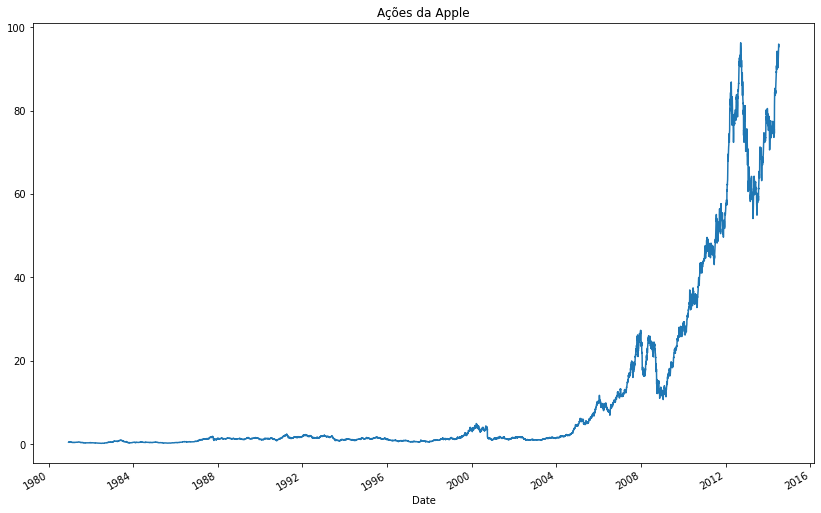

In [ ]:
# Cria um gráfico e atribui a uma variável
appl_open = apple['Adj Close'].plot(title = "Ações da Apple")

# Muda o tamanho da figura
fig = appl_open.get_figure()
fig.set_size_inches(14, 9)

### 12. Exibir o gráfico da coluna 'Adj Close' do dataframe apple_month. Defina o tamanho da figura como 13.5 x 9 polegadas.

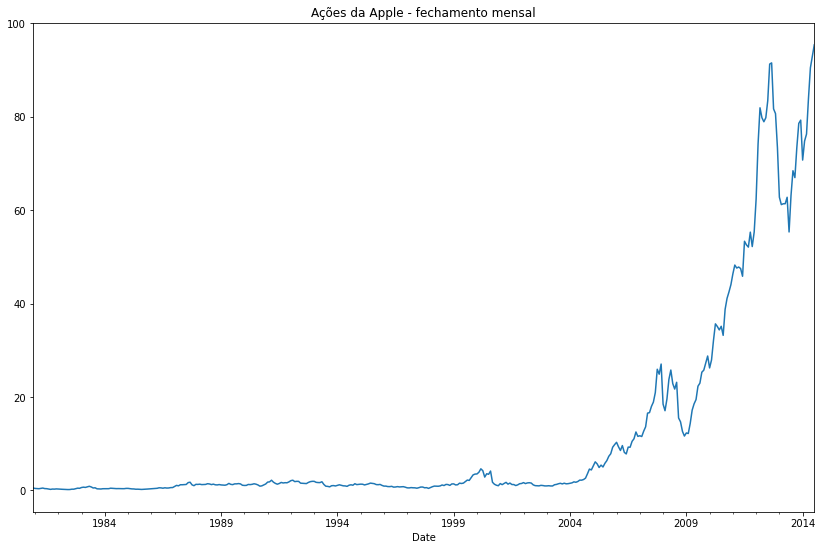

In [ ]:
# Cria um gráfico e atribui a uma variável
appl_open = apple_month['Adj Close'].plot(title = "Ações da Apple - fechamento mensal")

# Muda o tamanho da figura
fig = appl_open.get_figure()
fig.set_size_inches(14, 9)